# Introduction

In [1]:
import torch

x = torch.Tensor([5, 3])
y = torch.Tensor([2, 1])

print(x*y)

tensor([10.,  3.])


In [2]:
x = torch.zeros([2, 5])
print(x)
print(x.shape)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
torch.Size([2, 5])


In [3]:
y = torch.rand([2, 5])
y

tensor([[0.4249, 0.4882, 0.1251, 0.6793, 0.4253],
        [0.7984, 0.2018, 0.8401, 0.3684, 0.3745]])

In [4]:
y.view([1, 10])

tensor([[0.4249, 0.4882, 0.1251, 0.6793, 0.4253, 0.7984, 0.2018, 0.8401, 0.3684,
         0.3745]])

In [5]:
y

tensor([[0.4249, 0.4882, 0.1251, 0.6793, 0.4253],
        [0.7984, 0.2018, 0.8401, 0.3684, 0.3745]])

In [6]:
y = y.view([1, 10])

In [7]:
y

tensor([[0.4249, 0.4882, 0.1251, 0.6793, 0.4253, 0.7984, 0.2018, 0.8401, 0.3684,
         0.3745]])

# Data

In [8]:
import torch
import torchvision
from torchvision import transforms, datasets

In [10]:
train = datasets.MNIST(
    "",
    train=True,
    download=True,
    transform = transforms.Compose([transforms.ToTensor()])
)
test = datasets.MNIST(
    "",
    train=False,
    download=True,
    transform = transforms.Compose([transforms.ToTensor()])
)

0it [00:00, ?it/s]

 96%|█████████████████████████████████████████████████████████████████▌  | 9560064/9912422 [00:12<00:00, 711075.32it/s]

Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw



0it [00:00, ?it/s]


32768it [00:00, 55797.12it/s]                                                                                          

0it [00:00, ?it/s]

Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw



 75%|███████████████████████████████████████████████████                 | 1236992/1648877 [00:01<00:00, 523185.91it/s]
1654784it [00:01, 889648.91it/s]                                                                                       

0it [00:00, ?it/s]

Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw



8192it [00:00, 15763.77it/s]                                                                                           


Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw
Processing...
Done!


9920512it [00:29, 711075.32it/s]                                                                                       

In [11]:
trainset = torch.utils.data.DataLoader(
    train,
    batch_size=10,
    shuffle=True
)

testset = torch.utils.data.DataLoader(
    test,
    batch_size=10,
    shuffle=True
)

In [12]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [14]:
x, y = data[0][0], data[1][0]

print(y)

tensor(4)


torch.Size([1, 28, 28])


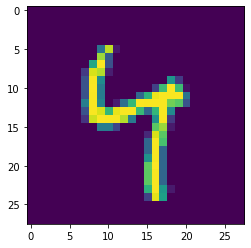

In [18]:
import matplotlib.pyplot as plt
print(x.shape)
plt.imshow(x.view(28, 28))

In [20]:
# Make sure that dataset is balanced
total = 0
counter_dict = {
    0:0,
    1:0,
    2:0,
    3:0,
    4:0,
    5:0,
    6:0,
    7:0,
    8:0,
    9:0
}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1
        
print(counter_dict)

for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total}")

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
0: 0.09871666666666666
1: 0.11236666666666667
2: 0.0993
3: 0.10218333333333333
4: 0.09736666666666667
5: 0.09035
6: 0.09863333333333334
7: 0.10441666666666667
8: 0.09751666666666667
9: 0.09915


# Build the Model

In [31]:
import torch.nn as nn
import torch.nn.functional as F

In [32]:
class Net(nn.Module):
    def __init__(self, structure):
        super().__init__()
        self.input_shape = structure[0]
        self.hidden1 = structure[1]
        self.hidden2 = structure[2]
        self.output_shape = structure[3]
        
        self.fc1 = nn.Linear(self.input_shape, self.hidden1)
        self.fc2 = nn.Linear(self.hidden1, self.hidden2)
        self.out = nn.Linear(self.hidden2, self.output_shape)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return F.log_softmax(x, dim=1)

In [33]:
for data in trainset:
    sampledata = data[0][1]
    break
shape = sampledata.shape
input_shape = shape[1]*shape[2]
output_shape = 10
hidden1 = 100
hidden2 = 100
structure = [input_shape, hidden1, hidden2, output_shape]

net = Net(structure)
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (out): Linear(in_features=100, out_features=10, bias=True)
)


# Train the Model

In [34]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001)

In [35]:
epochs = 3

for epoch in range(epochs):
    for data in trainset:
        X, y = data
        net.zero_grad()
        X = X.view(-1, 28*28)
        output = net(X)
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0181, grad_fn=<NllLossBackward>)
tensor(0.6662, grad_fn=<NllLossBackward>)
tensor(0.1180, grad_fn=<NllLossBackward>)


In [37]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        X = X.view(-1, 28*28)
        output = net(X)
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
            
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.981


In [38]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        X = X.view(-1, 28*28)
        output = net(X)
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
            
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.97
